In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

### Data Cleaning

#### Deleting useless columns

In [166]:
df.drop("Cabin", axis=1, inplace = True)
df.drop("Name", axis=1, inplace = True)
df.drop("Ticket", axis=1, inplace = True)

df_test.drop("Cabin", axis=1, inplace = True)
df_test.drop("Name", axis=1, inplace = True)
df_test.drop("Ticket", axis=1, inplace = True)

#### Dealing with NaN values

In [167]:
#Replacing NaN values in "Age" with the mean of values in the column
mean_age = df.Age.mean()
df.fillna(value=mean_age, inplace = True)

mean_age_test = df_test.Age.mean()
df_test.fillna(value=mean_age_test, inplace = True)

#2 values in Embarked are missing so replacing that with "C", since C has the highest frequency)
df.fillna(value="C",inplace=True)

#### Combining "Parch" and "SibSp" to create "Relatives" column and dropping them

In [168]:
df["Relatives"] = df.Parch+df.SibSp
df_test["Relatives"] = df.Parch+df.SibSp

df.drop("Parch",axis=1,inplace=True)
df.drop("SibSp",axis=1,inplace=True)

df_test.drop("Parch",axis=1,inplace=True)
df_test.drop("SibSp",axis=1,inplace=True)

#### Segregating "Age" into different bins based on the value 

In [169]:
df["phase"]= pd.cut(df.Age, bins = [0,17,29,50,100], labels=["child", "young","midlife", "oldie"] )
df["phase_num"]= pd.cut(df.Age, bins = [0,17,29,50,100], labels=["1", "2","3", "4"] )
df["phase_num"] = df["phase_num"].astype("int64")

df_test["phase"]= pd.cut(df_test.Age, bins = [0,17,29,50,100], labels=["child", "young","midlife", "oldie"] )
df_test["phase_num"]= pd.cut(df_test.Age, bins = [0,17,29,50,100], labels=["1", "2","3", "4"] )
df_test["phase_num"] = df_test["phase_num"].astype("int64")

### Visualizing Our Data

#### Survival based on gender

Text(0, 0.5, 'Number of people')

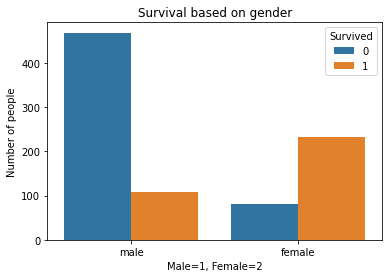

In [170]:
sns.countplot(x="Sex", data=df,hue="Survived")
plt.xlabel("Male=1, Female=2")
plt.title("Survival based on gender")
plt.ylabel("Number of people")

#### Survival based on Class

<AxesSubplot:xlabel='Pclass', ylabel='count'>

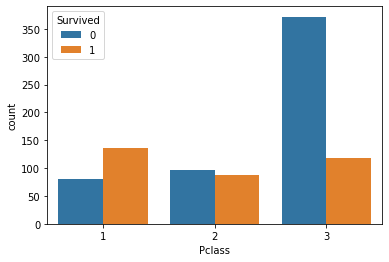

In [171]:
sns.countplot(x="Pclass", data=df,hue="Survived")

#### Survival based on number of relatives On-board

<AxesSubplot:xlabel='Relatives', ylabel='count'>

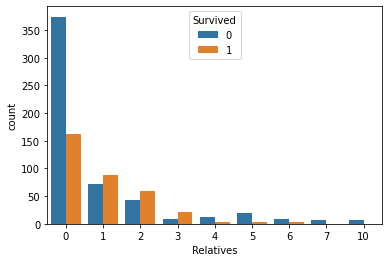

In [172]:
sns.countplot(x="Relatives", data=df,hue="Survived")

#### Survival of people based on age bracket

<AxesSubplot:xlabel='phase', ylabel='count'>

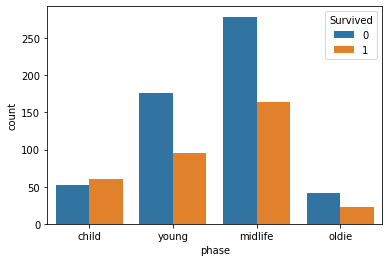

In [173]:
sns.countplot(x="phase", data=df,hue="Survived")

#### Survival of people based on age bracket and class

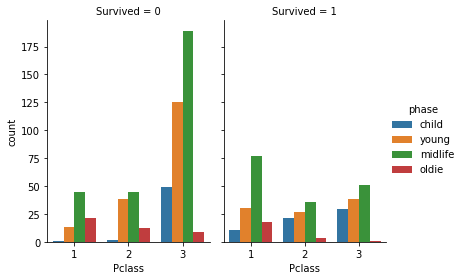

In [174]:
g = sns.catplot(x="Pclass", hue="phase", col="Survived",
                data=df, kind="count",
                height=4, aspect=.7)

### Extra Pre-processing

#### One-Hot Encoding "Sex" column

In [175]:
dummies = pd.get_dummies(df.Sex)
df = pd.concat([df,dummies], axis="columns")
df = df.drop("Sex", axis=1)

dummies = pd.get_dummies(df_test.Sex)
df_test = pd.concat([df_test,dummies], axis="columns")
df_test = df_test.drop("Sex", axis=1)

#### One-Hot Encoding "Embarked" column

In [176]:
dummies2 = pd.get_dummies(df.Embarked)
df = pd.concat([df,dummies2],axis="columns")
df = df.drop("Embarked", axis = 1)
df.drop(29.69911764705882,axis=1,inplace=True) # A column named 29.699... exists so I delete that 
df.at[61,'C'] = 1
df.at[829,'C'] = 1

dummies2 = pd.get_dummies(df_test.Embarked)
df_test = pd.concat([df_test,dummies2],axis="columns")
df_test = df_test.drop("Embarked", axis = 1)

### Predictive Analysis

In [177]:
from sklearn.ensemble import RandomForestRegressor

In [178]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,Relatives,phase,phase_num,female,male,C,Q,S
0,1,0,3,22.0,7.2500,1,young,2,0,1,0,0,1
1,2,1,1,38.0,71.2833,1,midlife,3,1,0,1,0,0
2,3,1,3,26.0,7.9250,0,young,2,1,0,0,0,1
3,4,1,1,35.0,53.1000,1,midlife,3,1,0,0,0,1
4,5,0,3,35.0,8.0500,0,midlife,3,0,1,0,0,1


In [179]:
df.corr()

,PassengerId,Survived,Pclass,Age,Fare,Relatives,phase_num,female,male,C,Q,S
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143,0.032844,-0.042939,0.042939,-0.001199,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639,-0.082618,0.543351,-0.543351,0.174718,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997,-0.246041,-0.131900,0.131900,-0.251139,0.221009,0.081720
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512,0.884038,-0.084153,0.084153,0.040804,-0.013855,-0.027121
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138,0.055944,0.182333,-0.182333,0.273614,-0.117216,-0.166603
Relatives,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000,-0.260693,0.200988,-0.200988,-0.049211,-0.058592,0.079977
phase_num,0.032844,-0.082618,-0.246041,0.884038,0.055944,-0.260693,1.000000,-0.094640,0.094640,0.027039,0.091461,-0.081147
female,-0.042939,0.543351,-0.131900,-0.084153,0.182333,0.200988,-0.094640,1.000000,-1.000000,0.090223,0.074115,-0.125722
male,0.042939,-0.543351,0.131900,0.084153,-0.182333,-0.200988,0.094640,-1.000000,1.000000,-0.090223,-0.074115,0.125722
C,-0.001199,0.174718,-0.251139,0.040804,0.273614,-0.049211,0.027039,0.090223,-0.090223,1.000000,-0.149345,-0.784064


In [180]:
xtrain = df[["Pclass","male", "female","Fare", "C","S"]] # "C", "Q", "S",
ytrain = df.Survived
xtest = df_test[["Pclass","male", "female","Fare", "C","S"]]

reg = RandomForestRegressor(max_depth=200, n_estimators=200)
reg.fit(xtrain, ytrain)
pred = reg.predict(xtest)

pred_int = pred.astype("int64")
df_test["Survived"] = pred_int
reg.score(xtrain,ytrain)

0.7030383348766698

#### Created model predicts survivors with an accuracy of 70%

In [181]:
df_test.loc[df_test.Survived == 1].count()

PassengerId    56
Pclass         56
Age            56
Fare           56
Relatives      56
phase          56
phase_num      56
female         56
male           56
C              56
Q              56
S              56
Survived       56
dtype: int64

In [182]:
df_pred = df_test.copy()
df_pred.drop(df_pred.iloc[:, 1:12], inplace = True, axis = 1)
df_pred.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [183]:
df_pred.to_csv("titanic_pred2.csv", index=False)